# pyVDJ tutorial

In [1]:
import pyvdj
import anndata
import glob
import scanpy
import scanpy.api as sc

/Users/peter/miniconda3/envs/bio/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
sc.settings.set_figure_params(dpi=100)

Construct filepaths and a dictionary linking files to sample names.

In [2]:
paths = glob.glob('data/*.csv')
snames = [p.replace('data/', '') for p in paths]
snames = [p.replace('.csv', '') for p in snames]
samples = dict(zip(paths, snames))
samples

{'data/5706STDY7883010.csv': '5706STDY7883010',
 'data/5706STDY7883011.csv': '5706STDY7883011',
 'data/5706STDY7883005.csv': '5706STDY7883005',
 'data/5706STDY7883007.csv': '5706STDY7883007',
 'data/5706STDY7883006.csv': '5706STDY7883006',
 'data/5706STDY7883012.csv': '5706STDY7883012',
 'data/5706STDY7883008.csv': '5706STDY7883008',
 'data/5706STDY7883009.csv': '5706STDY7883009'}

Load AnnData

In [3]:
h5adfile = 'anndata.h5ad'
adata = sc.read_h5ad(h5adfile)

This must contain a metadata column (`adata.obs['vdj_obs']`) of the following format: `cellbarcode + '_' + samplename`. This can be as simple as:

In [ ]:
#~ adata.obs['vdj_obs'] = adata.obs_names

if our cellnames follow the above pattern. Otherwise we may need to construct unique cell names from the cell barcodes and sample names (provided we have sample annotation):

    #~ cellnames = adata.obs_names
    #~ cellbarcode = cellnames.str.split("-").str[:2].str.join("-") # cell barcode part + '-1'
    #~ adata.obs['vdj_obs'] = cellbarcode.astype(str) + "_" + adata.obs['Sample'].astype(str)

We then read V(D)J data into the AnnData object and create annotations. Note that values in the `filtered_contig_annotations.csv` files cannot be directly added as annotations, because one cell may have 0 to n values per entry. It will be stored in `adata.uns` and annotation will be generated separately.

In [4]:
adata = pyvdj.load_vdj(paths, samples, adata)
adata = pyvdj.add_obs(adata, obs = ['clonotype', 'is_clone', 'is_productive'])

This loaded 10x V(D)J sequencing data (i.e. `filtered_contig_annotations.csv` files) into `adata.uns['pyvdj']`, and generated annotation in `adata.obs`. Now we can plot V(D)J properties:

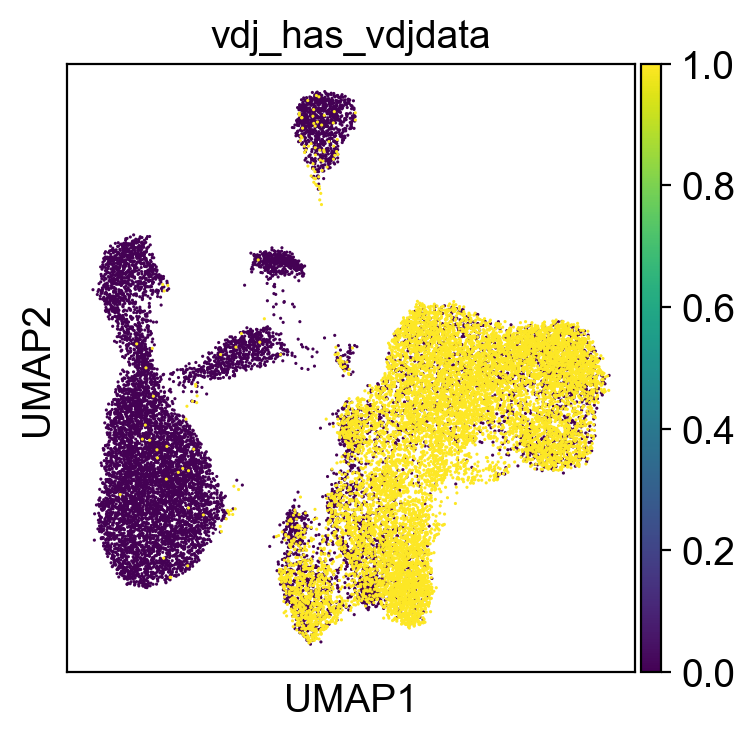

In [7]:
sc.pl.umap(adata, color='vdj_has_vdjdata')

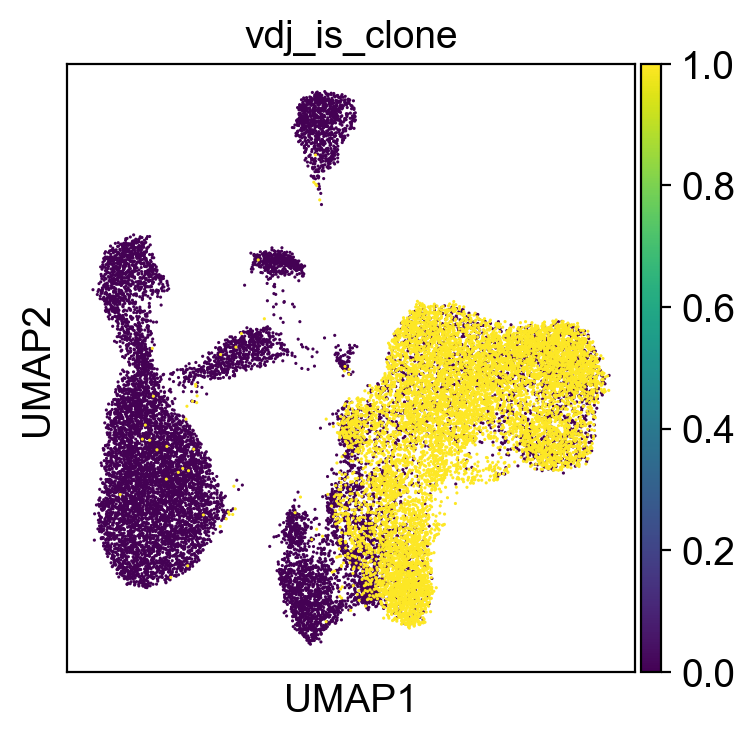

In [8]:
sc.pl.umap(adata, color='vdj_is_clone') # is the cell a clone of another cell?

The following command adds one metadata column for each type of chain found in the V(D)J data:

In [9]:
adata = pyvdj.add_obs(adata, obs = ['chains'])

TRB
Multi
TRA
None
IGL
IGH
IGK
TRG
TRD


... storing 'vdj_chain_TRB' as categorical
... storing 'vdj_chain_Multi' as categorical
... storing 'vdj_chain_TRA' as categorical
... storing 'vdj_chain_None' as categorical
... storing 'vdj_chain_IGL' as categorical
... storing 'vdj_chain_IGH' as categorical
... storing 'vdj_chain_IGK' as categorical
... storing 'vdj_chain_TRG' as categorical
... storing 'vdj_chain_TRD' as categorical


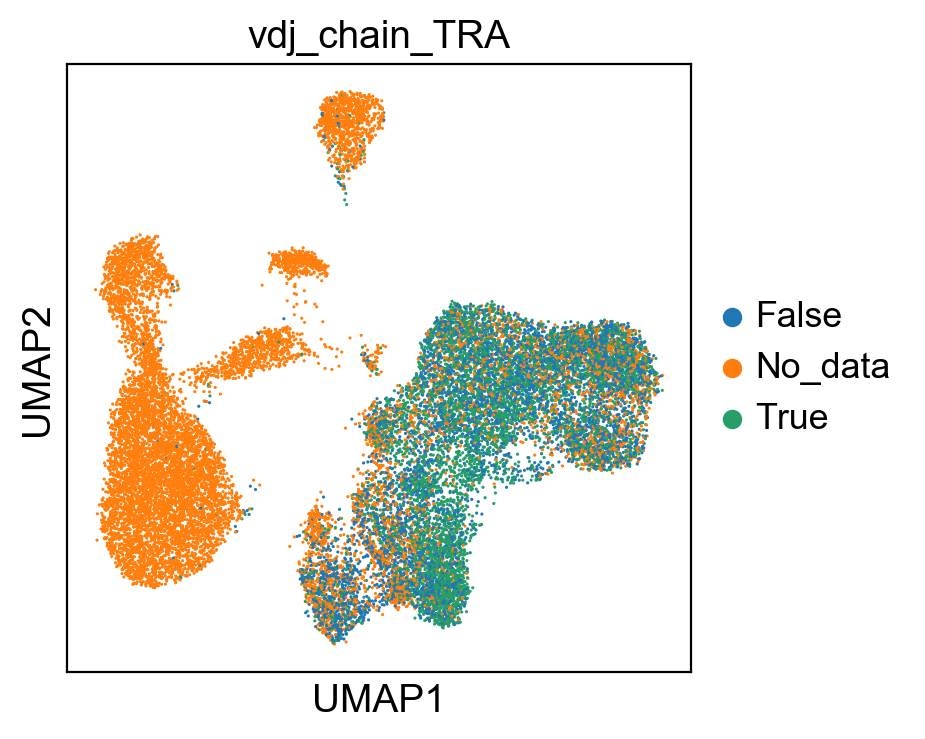

In [10]:
sc.pl.umap(adata, color='vdj_chain_TRA')

In [11]:
adata = pyvdj.add_obs(adata, obs = ['genes']) # one annotation for each gene

TRBC2
TRBC1
TRAC
None
TRGC1
IGHM
IGHD
TRDC
IGHE
IGHG1
IGHA2
IGHG2
IGHA1
IGLC1
IGHG4
IGHG3
IGKC


... storing 'vdj_constant_TRBC2' as categorical
... storing 'vdj_constant_TRBC1' as categorical
... storing 'vdj_constant_TRAC' as categorical
... storing 'vdj_constant_None' as categorical
... storing 'vdj_constant_TRGC1' as categorical
... storing 'vdj_constant_IGHM' as categorical
... storing 'vdj_constant_IGHD' as categorical
... storing 'vdj_constant_TRDC' as categorical
... storing 'vdj_constant_IGHE' as categorical
... storing 'vdj_constant_IGHG1' as categorical
... storing 'vdj_constant_IGHA2' as categorical
... storing 'vdj_constant_IGHG2' as categorical
... storing 'vdj_constant_IGHA1' as categorical
... storing 'vdj_constant_IGLC1' as categorical
... storing 'vdj_constant_IGHG4' as categorical
... storing 'vdj_constant_IGHG3' as categorical
... storing 'vdj_constant_IGKC' as categorical


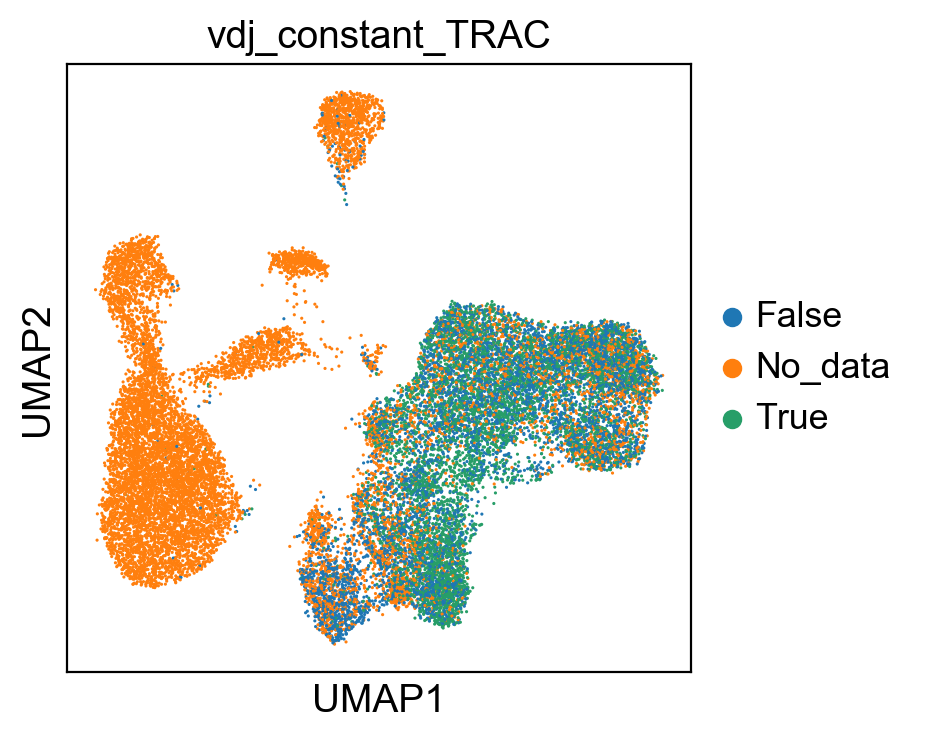

In [12]:
sc.pl.umap(adata, color='vdj_constant_TRAC')

We can flag which cells are members of a clonotype with not less than _n_ clones: 

... storing 'vdj_clonotype_gt_40' as categorical


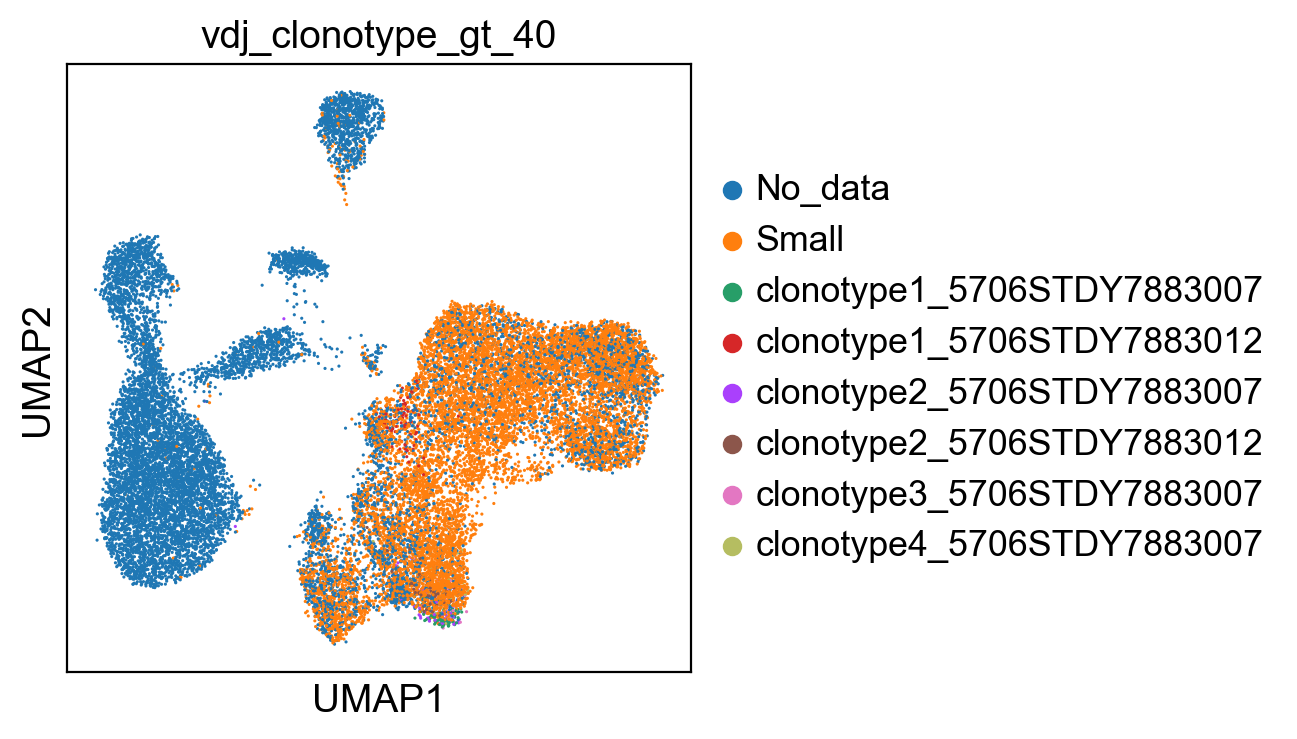

In [13]:
adata = pyvdj.add_gt_n(adata, n = 40)
sc.pl.umap(adata, color='vdj_clonotype_gt_40')

.. or assign to each cell the number of clones in its clonotype:

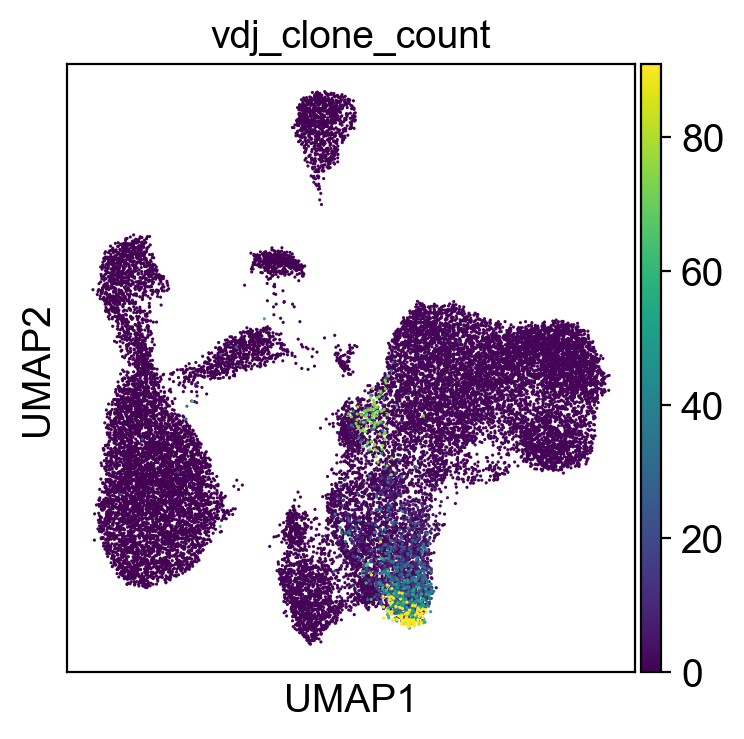

In [14]:
adata = pyvdj.add_clone_count(adata)
sc.pl.umap(adata, color='vdj_clone_count')